                                       Machine Learning with Imbalanced Dataset

IMBALANCED DATASET - The dataset may contain uneven samples /instances , so that it makes the algorithm to predict with accuracy of 1.0 each time u run the model. For example, if u have simple dataset with 4 features and output(target) feature with 2 class, then total no. of instances/samples be 100. Now, out of 100, 80 instances belongs to category1 of the output(target) feature and only 20 instances contribute to the category2 of the output(target) feature. So, obviously, this makes bias in training and predicting the model. So, this dataset refers to Imbalanced dataset.


Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = pd.read_csv("yeast.csv",sep=',')
print(file.head())

    Mcg   Gvh   Alm   Mit  Erl  Pox   Vac   Nuc     Class
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  negative
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  negative
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  negative
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  positive
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  negative


Computing the Basic Statistics(Descriptive) of the "Class" feature in the dataset. It shows that there are two unique values(positive and negative), with positive value counts upto 429 and negative 1055.
In [3]:


In [4]:
file['Class'].describe()

count         1484
unique           2
top       negative
freq          1055
Name: Class, dtype: object

Now, we just grouped the datset based on the 'class' feature to visualize the counts of positive and negative values.

In [5]:
f = file.groupby("Class")
f.count()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc
Class,,,,,,,,
negative,1055,1055,1055,1055,1055,1055,1055,1055
positive,429,429,429,429,429,429,429,429


We are converting the 'class' feature from text to int using .map function.

In [18]:
file['Class'] = file['Class'].map({'positive': 1, 'negative': 0})
print(file['Class'].head())

0    0
1    0
2    0
3    1
4    0
Name: Class, dtype: int64


In [19]:
f = file.groupby("Class")
f.count()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc
Class,,,,,,,,
0,1055,1055,1055,1055,1055,1055,1055,1055
1,429,429,429,429,429,429,429,429


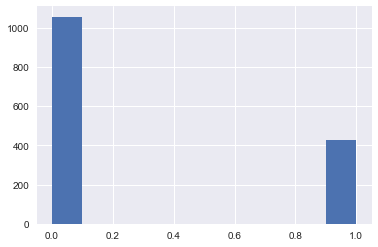

In [20]:
file['Class'].hist()

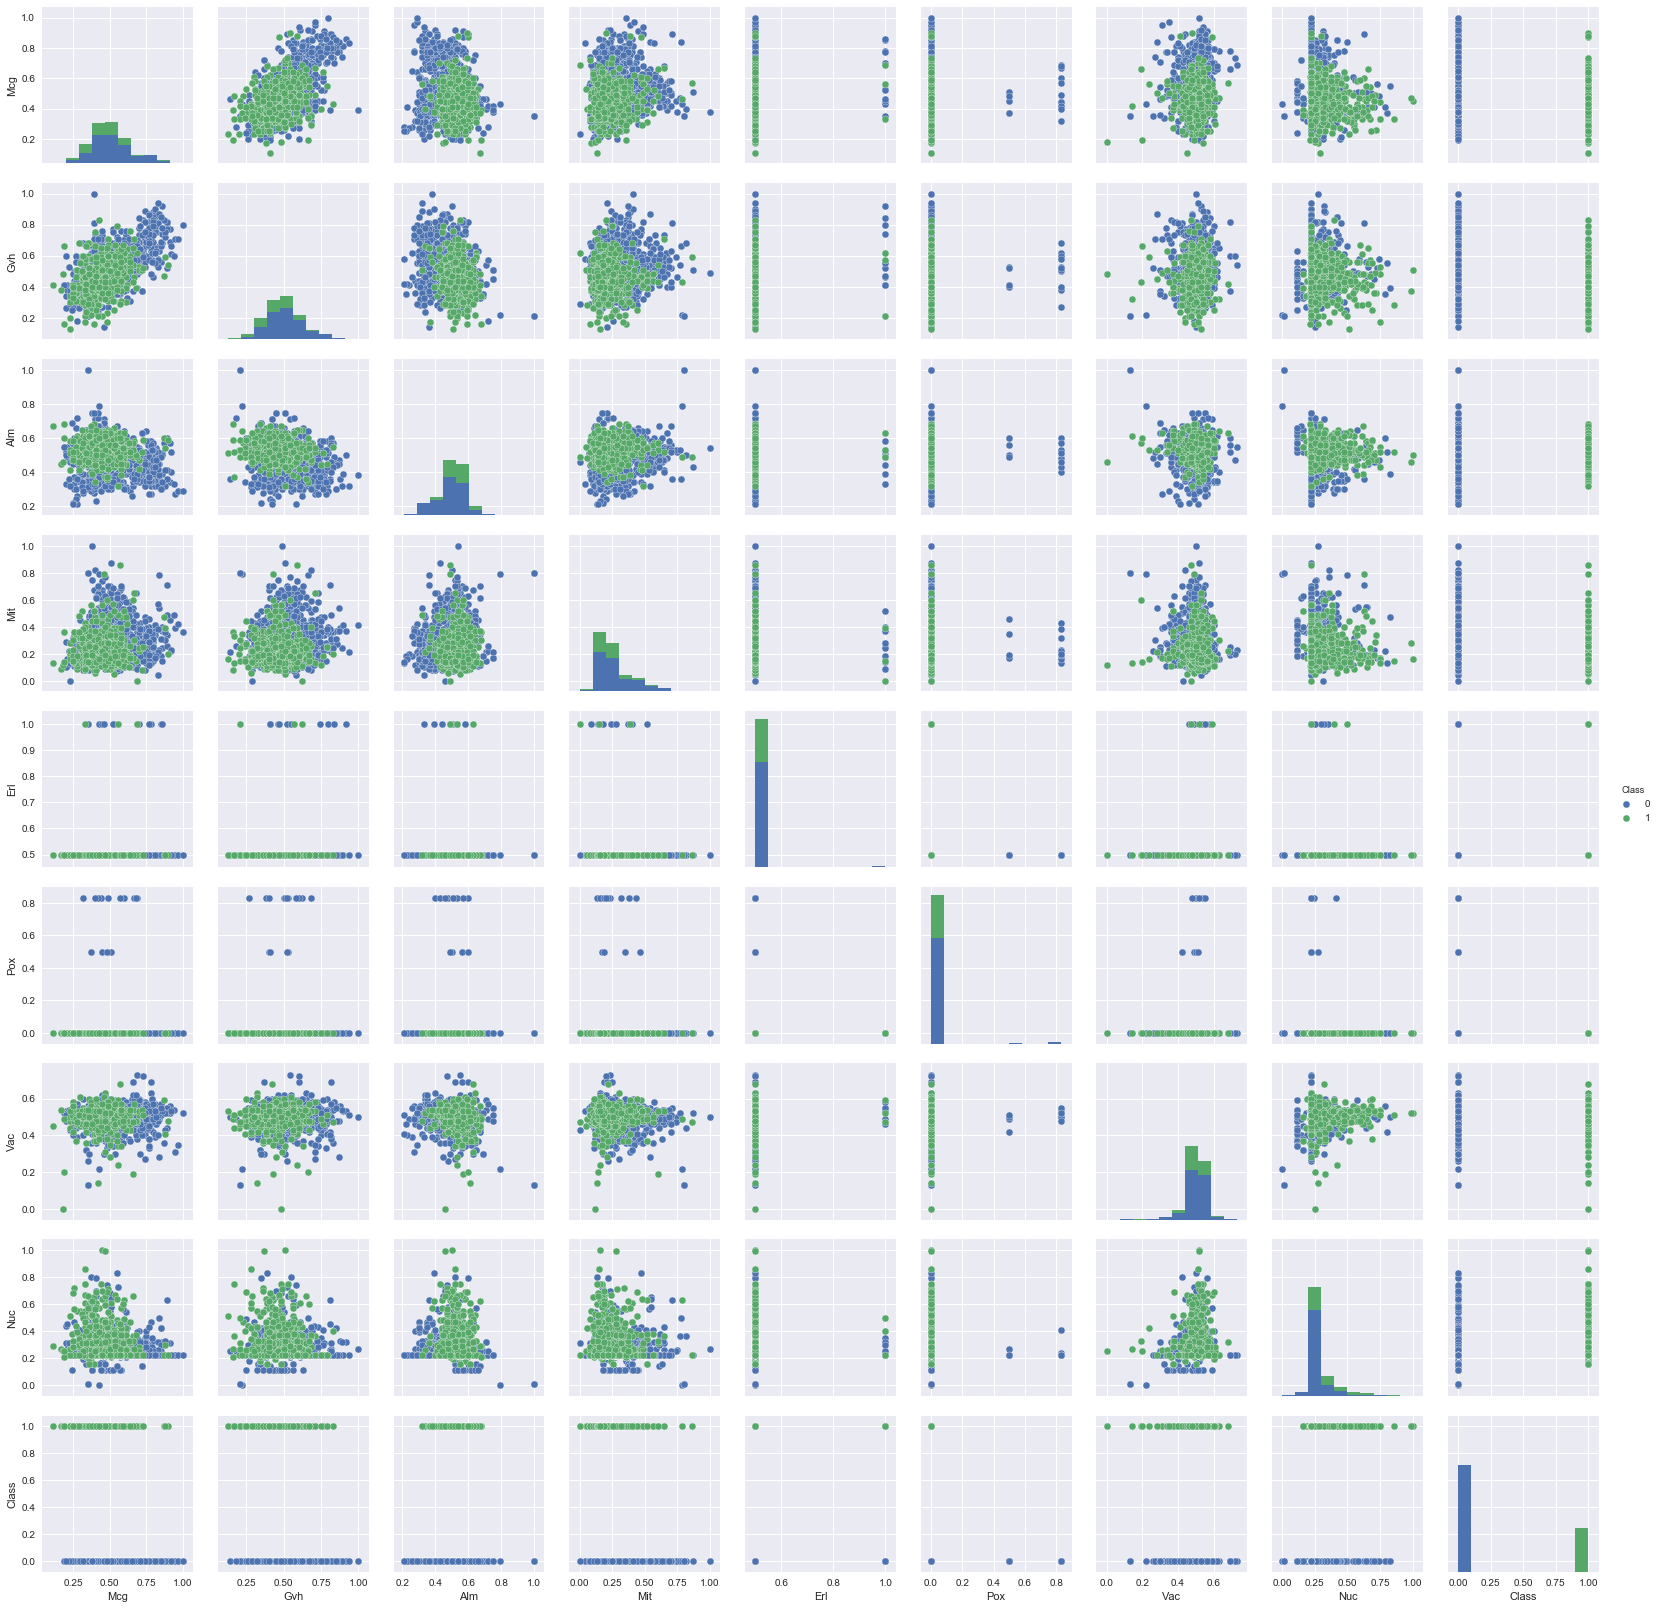

In [21]:
sns.pairplot(file,hue='Class')

Now using the sklearn library, we import train_test_test from cross validation and split the original dataset into training and test dataset(80,20).

In [22]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2,random_state=42)
features_train=train[['Mcg','Gvh','Alm','Mit','Erl','Pox','Vac','Nuc']]
features_test = test[['Mcg','Gvh','Alm','Mit','Erl','Pox','Vac','Nuc']]
labels_train = train.Class
labels_test = test.Class
print(features_train.shape)
print(features_test.shape)
print(labels_train.value_counts())
print(labels_test.value_counts())

(1187, 8)
(297, 8)
0    843
1    344
Name: Class, dtype: int64
0    212
1     85
Name: Class, dtype: int64


We build the normal model using the original dataset and we check for accuracy_score and roc_score for various algorithms.

1.RandomForestClassifier
2.LogisticRegression
3.svm.SVC(kernel='linear')
4.svm.SVC(kernel='rbf')
5.svm.SVC(kernel='poly')
6.DecisionTreeClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
clf = RandomForestClassifier(n_estimators=100, random_state=7).fit(features_train,labels_train)
prediction = clf.predict(features_test)
print(prediction)
print("Accuracy:",clf.score(features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1
 0]
Accuracy: 0.754208754209
ROC AUC Curve: 0.69586437195


In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(features_train,labels_train)
prediction = clf.predict(features_test)
print(prediction)
print("Accuracy:",clf.score(features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0]
Accuracy: 0.737373737374
ROC AUC Curve: 0.676143451143


Selecting the important features from the original dataset.

In [25]:
feature_labels=['Mcg','Gvh','Alm','Mit','Erl','Pox','Vac','Nuc']
model = RandomForestClassifier()
model.fit(features_train,labels_train)
for feature in zip(feature_labels,model.feature_importances_):
    print(feature)

('Mcg', 0.17137597282112557)
('Gvh', 0.1754544223158882)
('Alm', 0.17321619557661591)
('Mit', 0.14901054311722489)
('Erl', 0.0020243501132002086)
('Pox', 0.0017820269597814957)
('Vac', 0.12277396260068611)
('Nuc', 0.20436252649547768)


As you see, we can set the threshold value of "0.10" above which the features are selected and below that are sliced to form a new dataset.

In [28]:
new_file = file[['Mcg','Gvh','Alm','Mit','Vac','Nuc','Class']]
new_file.head()

,Mcg,Gvh,Alm,Mit,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.48,0.22,0
1,0.43,0.67,0.48,0.27,0.53,0.22,0
2,0.64,0.62,0.49,0.15,0.53,0.22,0
3,0.58,0.44,0.57,0.13,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.48,0.22,0


Again performing train_test_split with the new sliced dataset.

In [29]:
new_train, new_test = train_test_split(new_file,test_size=0.2,random_state=42)
new_features_train = new_train[['Mcg','Gvh','Alm','Mit','Vac','Nuc']]
new_features_test = new_test[['Mcg','Gvh','Alm','Mit','Vac','Nuc']]
labels_train = new_train.Class
labels_test = new_test.Class
print(new_features_train.shape)
print(new_features_test.shape)
print(labels_train.value_counts())
print(labels_test.value_counts())

(1187, 6)
(297, 6)
0    843
1    344
Name: Class, dtype: int64
0    212
1     85
Name: Class, dtype: int64


So we have seen the accuracy and roc values for the algorithms with the original dataset. Now its time for us to use the various sampling algorithms to handled the imbalanced dataset.

There two main ways to handle the Imbalanced datset:

1.Over Sampling 
2.Under Sampling

OVER SAMPLING: It is nothing but Sampling the minority class and making it equivalent to the majority class 
Ex:before sampling: Counter({1: 111, 0: 65}) 
after sampling: Counter({1: 111, 0: 111}) 
Note:The counts of 1's and 0's before and after sampling


OVER SAMPLING ALGORITHM: 

1.SMOTE - Synthetic Minority Over Sampling Technique A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models


In [30]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(new_features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(y_resampled)))
print(X_resampled.shape)

before sampling: Counter({0: 843, 1: 344})
after sampling: Counter({0: 843, 1: 843})
(1686, 6)


Now after over sampling the training data set, we again train and test our model with previously used ML algorithms to check for the accuracy and roc_score on the test data.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
clf = RandomForestClassifier(n_estimators=100, random_state=7).fit(X_resampled, y_resampled)
prediction = clf.predict(new_features_test)
print(prediction)
print("Accuracy:",clf.score(new_features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))
print(np.unique(prediction))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1
 0]
Accuracy: 0.727272727273
ROC AUC Curve: 0.669323671498
[0 1]


In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_resampled, y_resampled)
prediction = clf.predict(new_features_test)
print(prediction)
print("Accuracy:",clf.score(new_features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1
 1]
Accuracy: 0.656565656566
ROC AUC Curve: 0.654421768707


UNDER SAMPLING: It is nothing but Sampling the majority class and making it equivalent to the minority class 
Ex:before sampling: Counter({1: 111, 0: 65}) 
after sampling: Counter({0: 65, 1: 65})

UNDER SAMPLING ALGORITHM: 

1.RandomUnderSampler - Random Undersampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

2.NearMiss - selects the majority class samples whose average distances to three closest minority class samples are the smallest.

In [34]:
from collections import Counter
from imblearn.under_sampling import NearMiss
rus = NearMiss(random_state=42)
under_X_resampled, under_y_resampled = rus.fit_sample(new_features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(under_y_resampled)))
print(under_X_resampled.shape)

before sampling: Counter({0: 843, 1: 344})
after sampling: Counter({0: 344, 1: 344})
(688, 6)


Now after under sampling the training data set, we again train and test our model with previously used ML algorithms to check for the accuracy and roc_score on the test data.

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(under_X_resampled, under_y_resampled)
prediction = clf.predict(new_features_test)
print(prediction)
print("Accuracy:",clf.score(new_features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))

[1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1
 0]
Accuracy: 0.666666666667
ROC AUC Curve: 0.628160212101


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
clf = RandomForestClassifier(n_estimators=100, random_state=7).fit(under_X_resampled, under_y_resampled)
prediction = clf.predict(new_features_test)
print(prediction)
print("Accuracy:",clf.score(new_features_test,labels_test))
print("ROC AUC Curve:",roc_auc_score(prediction,labels_test))
print(np.unique(prediction))

[1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0]
Accuracy: 0.558922558923
ROC AUC Curve: 0.579012345679
[0 1]
